# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Wed, 05 Apr 2023   Prob (F-statistic):             0.0991
Time:                        21:30:08   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Older people tend to have higher BMI than younger people. This is given by the coefficient 0.0091 which tells us that on average, for each year older, BMI increases by 0.0091 (OLS).

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

The p-value for this independent variable is 0.099, which is less than the 95% confidence but within 90% confidence. However, given the R-squared value of 0.001, it's all-together a poor model and there could be no meaningful claim of relationship towards the process of building a model from this regression output alone.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

The math of this is 40 * 0.0091 - 20 * 0.0091 or (40-20) * 0.0091. The average BMI difference between a 40 year old and a 20 year old is 0.182 in respect to the model.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

The R-squared value, which identifies the fraction of the variation in the dependent variable explained by the independent variable(s), is 0.001. This is 0.1% of the variation.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [3]:
da['RIDRETH1x'] = da['RIDRETH1'].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
                        4: "Non-Hispanic Black", 5 : "Other Race - Including Multi-Racial", np.nan: "Missing"})
#da['RIDRETH1x'].value_counts()
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"})

In [4]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.98e-59
Time:                        21:30:08   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           29.1908      0.456     63.988      0.000      28.296      30.085
RIDRETH1x[T.Non-Hispanic Black]                     -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]                     -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]                         -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                                             0.0065      0.005      1.196      0.232      -0.004       0.017
RIAGENDR                                             1.0226      0.190      5.370      0.000       0.649       1.396
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
da[["RIDAGEYR", "RIAGENDR", 'RIDRETH1']].corr()

,RIDAGEYR,RIAGENDR,RIDRETH1
RIDAGEYR,1.000000,-0.021398,-0.042591
RIAGENDR,-0.021398,1.000000,-0.025863
RIDRETH1,-0.042591,-0.025863,1.000000


__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

The coefficient went from 0.0091 to 0.0065 when additional covariates were added. This is due to overlapping correlation with the added independent variables.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

It decreased from 0.006 to 0.005 when additional covariates were added. This is due to overlapping correlation with the added independent variables.

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

The adjusted R-squared is 0.054. Subtracting this from the original R-squared value of 0.001 gives 0.053.

__Q2d.__ What reference level did the software select for the ethnicity variable?

The reference level for the ethnicity variable was Mexican American.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

This is equivalent to the difference between 40 RIDAGEYR and 30 RIDAGEYR. As the coefficient is 0.0065, the 40 year old will have 10 * 0.0065 more BMI on average, 0.065.

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

To solve this, we need the difference between Mexican American and non-Hispanic black as well as the difference between woman and man. Women have, on average, 1.0226 more BMI. Mexican Americans have, on average, 0.4499 more BMI than non-Hispanic black.
1.0226 + 0.4499 = 1.4725.

The 50 year-old Mexican American woman has, on average, 1.4725 more BMI than a 50 year-old non-Hispanic black man.

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [6]:
da_sample = da.sample(frac=0.25, replace=True)

In [7]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da_sample)
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.873
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.67e-09
Time:                        21:30:08   Log-Likelihood:                -4235.0
No. Observations:                1276   AIC:                             8484.
Df Residuals:                    1269   BIC:                             8520.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.1646      0.717     43.447      0.000      29.757      32.572
RIAGENDRx[T.Male]                                   -0.4935      0.376     -1.312      0.190      -1.231       0.244
RIDRETH1x[T.Non-Hispanic Black]                     -0.2199      0.623     -0.353      0.724      -1.441       1.002
RIDRETH1x[T.Non-Hispanic White]                     -1.6044      0.564     -2.844      0.005      -2.711      -0.498
RIDRETH1x[T.Other Hispanic]                         -0.2405      0.702     -0.343      0.732      -1.617       1.136
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.0193      0.678     -5.932      0.000      -5.349      -2.690
RIDAGEYR                                            -0.0066      0.011     -0.608      0.543      -0.028       0.015
==============================================================================
Omnibus:                      228.484   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.427
Skew:                           1.050   Prob(JB):                     3.46e-99
Kurtosis:                       5.029   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

The regression coefficients vary either higher or lower but surround the full dataset's coefficients. The standard errors are higher in the model with the lower amount of samples. The systematic relationship is how the coefficients of the sample's regression tend to stay within the 95% CI of the original each time you repeat the sampling.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

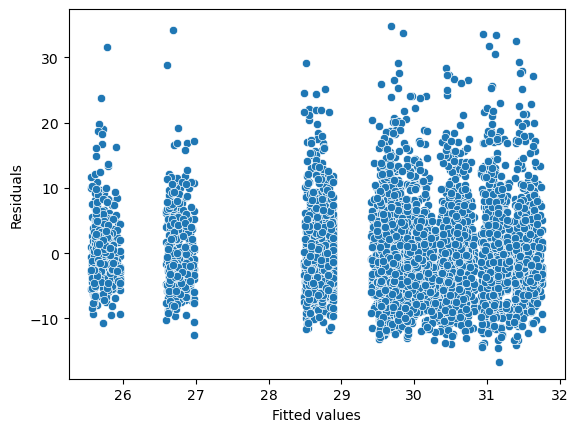

In [8]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()

pp = sns.scatterplot(x = result.fittedvalues, y = result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

The mean/variance relationship is moderately increasing.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

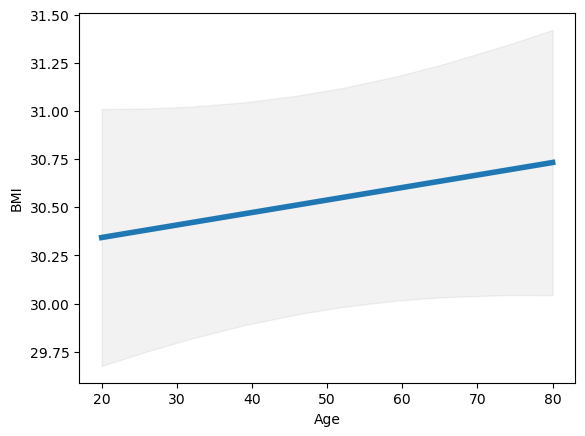

In [9]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Male", "RIDRETH1x": 'Mexican American',
          'SMQ020': "_", "DMDEDUC2": "_", "RIAGENDR" : "_", "RIDRETH1":"_","BPXSY1":"_"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x = fv, y = pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.1)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

A horizontal line from age 30 to the maximum, 80, is possible within our Confidence interval.

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

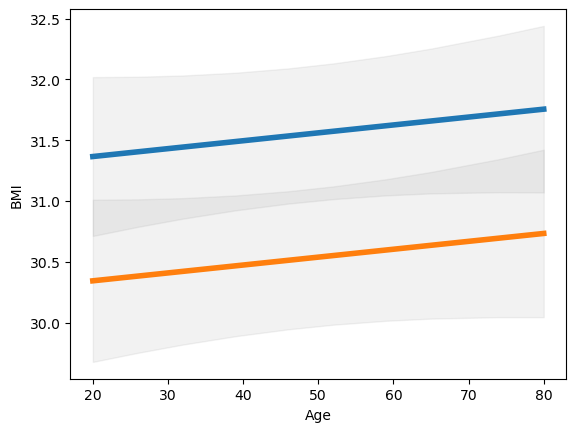

In [10]:
values = {"RIAGENDRx": "Female", "RIDRETH1x": 'Mexican American',
         'SMQ020': "_", "DMDEDUC2": "_", "RIAGENDR" : "_", "RIDRETH1":"_","BPXSY1":"_"}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x = fv, y = pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.1)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values = {"RIAGENDRx": "Male","RIDRETH1x": 'Mexican American',
         'SMQ020': "_", "DMDEDUC2": "_", "RIAGENDR" : "_", "RIDRETH1":"_","BPXSY1":"_"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x = fv, y = pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.1)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

These intervals overlap over the complete range of ages.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

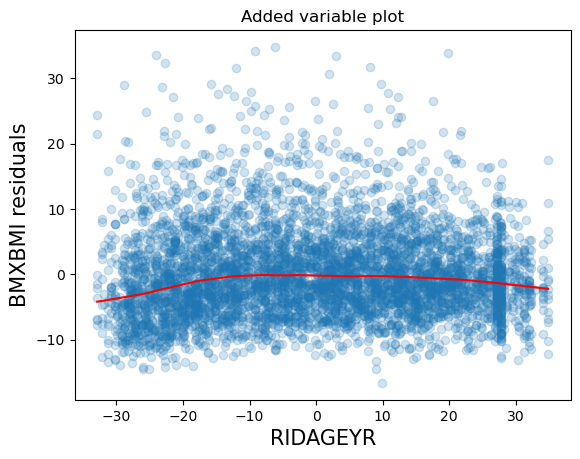

In [11]:
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result3 = model.fit()
result3.summary()

fig = result3.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

The added variable plot is a graphical tool to detect nonlinearity. From the plot we can see that BMI increases from age 20 until 40, and then decreases gradually until 70, with a slightly steeper drop after 70.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [12]:
da = pd.read_csv(url)

vals = ['ALQ110', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2']
df = da[vals].dropna()

In [13]:
df['ALQ110x'] = df.ALQ110.replace({1: ">=12 Drinks", 2: "<12 Drinks", 7: np.nan, 9: np.nan})

df["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

df['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"})

In [14]:
c = pd.crosstab(df.RIAGENDRx, df.ALQ110x).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.iloc[:, 1] / c.iloc[:, 0]
c.iloc

In [15]:
c.odds.Female / c.odds.Male

0.9650236127508856

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

Based on the log odds alone, we know that less than 50% of women drink alcohol because the value is less than one (0.816558).

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

There appears to be a small difference between the alcohol partaking rates by gender, with a man having around 1.036 times greater odds of drinking than a woman (in the population represented by these data).

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [16]:
df.ALQ110 = df.ALQ110.replace({2: 0, 7: np.nan, 9: np.nan})

In [17]:
model = sm.GLM.from_formula("ALQ110 ~ RIAGENDRx", family=sm.families.Binomial(), data=df)
result4 = model.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 ALQ110   No. Observations:                 1575
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.4
Date:                Wed, 05 Apr 2023   Deviance:                       2168.8
Time:                        21:30:10   Pearson chi2:                 1.58e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          6.464e-05
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2027      0.060     -3.372      0.001      -0.320      -0.085
RIAGENDRx[T.Male]     0.0356      0.112      0.319      0.750      -0.183       0.254
=====================================================================================
"""

In [18]:
c["logodds"] = np.log(c.odds)
c

ALQ110x,<12 Drinks,>=12 Drinks,odds,logodds
RIAGENDRx,,,,
Female,0.550492,0.449508,0.816558,-0.202657
Male,0.541667,0.458333,0.846154,-0.167054


__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

In [19]:
#Female
n1 = sum((df.RIAGENDRx == "Female")& (df.ALQ110x.notna()))
p = sum((df.RIAGENDRx == "Female")& (df.ALQ110x == ">=12 Drinks")) / n1
se_female = np.sqrt(p * (1 - p) / n1)

#Male
n2 = sum((df.RIAGENDRx == "Male")& (df.ALQ110x.notna()))
p = sum((df.RIAGENDRx == "Male")& (df.ALQ110x == ">=12 Drinks")) / n2
se_male = np.sqrt(p * (1 - p) / n2)

#Difference CI
se_diff = np.sqrt(se_female**2 + se_male**2)
d = (sum((df.RIAGENDRx == "Female")& (df.ALQ110x == ">=12 Drinks")) / n1) - (sum((df.RIAGENDRx == "Male")& (df.ALQ110x == ">=12 Drinks")) / n2)
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print("95% Difference CIs:", ((lcb, ucb)))

95% Difference CIs: (-0.06416285360480053, 0.046513166384067745)


The prior analysis assumed statistical evidence, and used the proportions as given. Using the above analysis, the confidence interval is calculated and shows we DO NOT have enough evidence to claim the drinking rates differ between women and men as zero lies within the intervals. 

__Q8b.__ Confirm that the logistic regression coefficient for male gender is exactly equal to the difference between the log odds statistics for males and females.

In [20]:
c.logodds.Male - c.logodds.Female

0.035602708770614305

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [21]:
model = sm.GLM.from_formula("ALQ110 ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 ALQ110   No. Observations:                 1574
Model:                            GLM   Df Residuals:                     1567
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.5
Date:                Wed, 05 Apr 2023   Deviance:                       2118.9
Time:                        21:30:10   Pearson chi2:                 1.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03053
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4296      0.185     -2.316      0.021      -0.793      -0.066
RIAGENDRx[T.Male]            0.0172      0.114      0.151      0.880      -0.205       0.240
DMDEDUC2x[T.HS]             -0.0873      0.157     -0.556      0.578      -0.395       0.221
DMDEDUC2x[T.SomeCollege]     0.0536      0.146      0.367      0.713      -0.232       0.339
DMDEDUC2x[T.lt9]            -0.8972      0.171     -5.253      0.000      -1.232      -0.562
DMDEDUC2x[T.x9_11]          -0.4886      0.182     -2.681      0.007      -0.846      -0.131
RIDAGEYR                     0.0086      0.003      2.951      0.003       0.003       0.014
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

Age, <9 years of education, between 9 and 11 years of education.

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

The intercept is -0.4296. Neither 'college educated' nor 'woman' attributes move this. For 50 years old, multiply 50 * 0.0086.
The odds of a college educated, 50 year old woman drinking is the exponential of (-0.4296 + 50 * 0.0086).

In [22]:
import math

math.exp(-0.4296 + 50 * 0.0086)

1.0004000800106678

This result informs us that the associated proportion is slightly larger than 0.5.

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [23]:
math.exp(0) / math.exp(-0.0873)

1.0912239978174532

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

Because neither value is statistically significant, both p-values greater than 0.7, the regression parameter did not change to a meaningful degree.

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

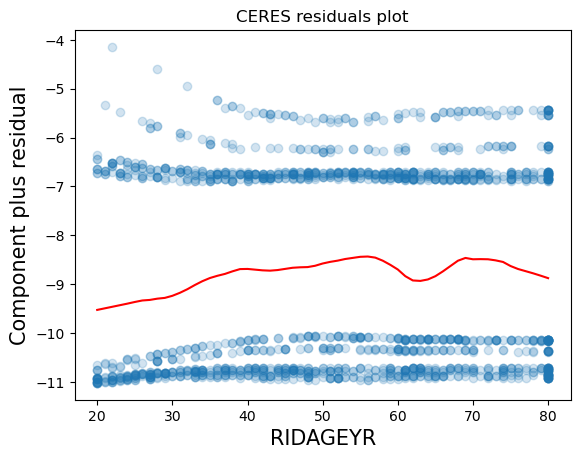

In [24]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

The above graph shows the non-linear trends of drinking rates across ages. It shows a considerable dip in drinking rates within the 56-67 ages. It's important to note that as time goes on, we expect to see increasing rates for each age shift as this statistic is based on having indulged in 12 alcoholic beverages over a lifetime. Since that drop, there has been a consistent increase, more in line with expectations. To rephrase, the value for the group that makes up 20 year olds can only increase if resurveyed over the next years when they are 21, 22, so on.